In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

Load data

In [18]:
from DataLoader import HeartFailureDataset

load_data = HeartFailureDataset()
X = load_data.get_features()
y = load_data.get_targets()
X.shape

(299, 12)

In [19]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


We need to scale our data. Without scaling the data, the nerual network does not work! The gradients are too small!

In [20]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [ 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,0.000166,0,20,1,1.681648e-02,0.490057,-1.504036,1,0,4
1,55.0,0,7.514640,0,38,0,7.535660e-09,-0.284552,-0.141976,1,0,6
2,65.0,0,-0.449939,0,20,0,-1.038073e+00,-0.090900,-1.731046,1,1,7
3,50.0,1,-0.486071,0,20,0,-5.464741e-01,0.490057,0.085034,1,0,7
4,65.0,1,-0.435486,1,20,0,6.517986e-01,1.264666,-4.682176,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,-0.537688,1,38,1,-1.109765e+00,-0.284552,1.447094,1,1,270
295,55.0,0,1.278215,0,38,0,6.802472e-02,-0.187726,0.539054,0,0,271
296,45.0,0,1.525979,1,60,0,4.902082e+00,-0.575031,0.312044,0,0,278
297,45.0,0,1.890398,0,38,0,-1.263389e+00,0.005926,0.766064,1,1,280


### **Set up Logistic Regression model**
We want to set up our logistic regression by using a neural network. We will use one Linear Layer and the sigmoid function to transform our data in a range between 0 and 1.

In [21]:
class LogisticRegression(nn.Module): 
    def __init__(self, input_dimensions):
        super().__init__()
        self.linear = nn.Linear(in_features = input_dimensions, out_features = 1)

    def forward(self,x): # Define forard function which applies sigmoid function to our output 
        return torch.sigmoid(self.linear(x))

In [22]:
LR_model = LogisticRegression(input_dimensions=X.shape[1])

So far, we will use the *binary cross-entropy-loss* (**BCELoss**). Later on, one can try different other loss functions.  
For a standard Logistic Regression without any regularization, we can use *Gradient Descent* as an optimization tool.

In [23]:
loss_fun = nn.BCELoss() 
learning_rate = 0.0001
optimizer = optim.SGD(LR_model.parameters(), lr=learning_rate)

### **Training step**

In [24]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
Y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

In [25]:
epochs = 500
plot_gradients = False

# We wish to save the trajectory of weight, bias and loss
hist_W = []
hist_b = []
hist_loss = []

#Trainigsloop bleibt auch bei mehrschichtigen Netzen gleich
for epoch in range(epochs):
    pred = LR_model(X_tensor)                       # Forward pass
    loss = loss_fun(pred, Y_tensor)                 # Compute loss

    optimizer.zero_grad()   # Gradienten auf Null setzen
    loss.backward()         # Berechne den Gradienten
    optimizer.step()        # Optimierungsschritt nach Gradient Descent 

    hist_loss.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")
        if plot_gradients:
            for name, param in LR_model.named_parameters():
                if param.grad is not None:
                    print(f"Gradient of {name} : {param.grad}")

    


Epoch 0: Loss = 7.0258
Epoch 50: Loss = 3.5328
Epoch 100: Loss = 2.1098
Epoch 150: Loss = 0.9014
Epoch 200: Loss = 0.4770
Epoch 250: Loss = 0.4368
Epoch 300: Loss = 0.4305
Epoch 350: Loss = 0.4280
Epoch 400: Loss = 0.4263
Epoch 450: Loss = 0.4248


Visualize loss function for the training iterations. Test this one for different learning rates.

In [26]:
for name, param in LR_model.named_parameters():
    print(f"Parameter: {name}")
    print(param.data)  

Parameter: linear.weight
tensor([[ 0.0428, -0.0563,  0.0160, -0.0440, -0.0368, -0.1913,  0.2667, -0.0581,
         -0.2718,  0.0112,  0.1034, -0.0188]])
Parameter: linear.bias
tensor([0.1134])


## **Test different learning rates**

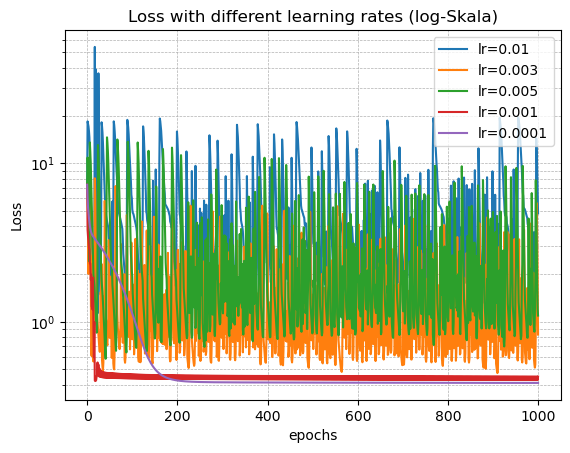

In [27]:
lr = [0.01, 0.003 ,0.005, 0.001, 0.0001]
losses = []

for learning_rate in lr:
    torch.manual_seed(41)
    LR_model = LogisticRegression(input_dimensions=X.shape[1])

    loss_fun = nn.BCELoss() 
    optimizer = optim.SGD(LR_model.parameters(), lr=learning_rate)

    X_tensor = torch.tensor(X.values, dtype=torch.float32)
    Y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    epochs = 1000

    # We wish to save the trajectory of weight, bias and loss
    hist_W = []
    hist_b = []
    hist_loss = []

    #Trainigsloop bleibt auch bei mehrschichtigen Netzen gleich
    for epoch in range(epochs):
        pred = LR_model(X_tensor)                       # Forward pass
        loss = loss_fun(pred, Y_tensor)                 # Compute loss

        optimizer.zero_grad()   # Gradienten auf Null setzen
        loss.backward()         # Berechne den Gradienten
        optimizer.step()        # Optimierungsschritt nach Gradient Descent 

        hist_loss.append(loss.item())
    
    losses.append(hist_loss)

for hist_loss in losses:
    plt.plot(hist_loss)

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.yscale("log")  # <-- log-Skalierung der y-Achse
plt.legend([f"lr={l}" for l in lr])
plt.title("Loss with different learning rates (log-Skala)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

Choose **lr = 0.0001** as the learning rate.

## **Cross-Validation**
First, we build up a complete model, including a fit() and pred() function.

In [28]:
X.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,299.00000,299.000000
mean,60.833893,0.431438,0.000000,0.418060,38.083612,0.351171,7.723291e-17,1.425838e-16,-8.673849e-16,0.648829,0.32107,130.260870
std,11.894809,0.496107,1.001676,0.494067,11.834841,0.478136,1.001676e+00,1.001676e+00,1.001676e+00,0.478136,0.46767,77.614208
min,40.000000,0.000000,-0.576918,0.000000,14.000000,0.000000,-2.440155e+00,-8.655094e-01,-5.363206e+00,0.000000,0.00000,4.000000
25%,51.000000,0.000000,-0.480393,0.000000,30.000000,0.000000,-5.208700e-01,-4.782047e-01,-5.959961e-01,0.000000,0.00000,73.000000
50%,60.000000,0.000000,-0.342574,0.000000,38.000000,0.000000,-1.390846e-02,-2.845524e-01,8.503384e-02,1.000000,0.00000,115.000000
75%,70.000000,1.000000,0.000166,1.000000,45.000000,1.000000,4.111199e-01,5.926150e-03,7.660638e-01,1.000000,1.00000,203.000000
max,95.000000,1.000000,7.514640,1.000000,80.000000,1.000000,6.008180e+00,7.752020e+00,2.582144e+00,1.000000,1.00000,285.000000


In [29]:
class LR_complete(nn.Module): 
    def __init__(self, input_dimensions):
        super().__init__()
        self.linear = nn.Linear(in_features = input_dimensions, out_features = 1)

    def forward(self,x): # Define forard function which applies sigmoid function to our output 
        return torch.sigmoid(self.linear(x))

    def fit(self, X_train, y_train, epochs=1000, learning_rate = 0.005, regularization = None, alpha = 1):
        X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

        loss_fun = nn.BCELoss() 
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)
        
        for epoch in range(epochs):
            pred = self.forward(X_train_tensor)
            base_loss = loss_fun(pred, y_train_tensor)

            if regularization == 'l1':
                l1_penalty = torch.sum(torch.abs(self.linear.weight))
                reg_term = alpha * l1_penalty

            elif regularization == 'l2':
                l2_penalty = torch.sum(self.linear.weight ** 2)
                reg_term = alpha * l2_penalty
            
            else:
                reg_term = torch.tensor(0.0)
            
            loss = base_loss + reg_term

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #if epoch % 100 == 0:
                #print("Epoch ", epoch, " : ",base_loss)

        self.final_weights = self.linear.weight.data
        self.final_bias = self.linear.bias.data
        self.final_base_loss = base_loss.item()
        self.final_total_loss = base_loss.item() + reg_term.item()

        if regularization == 'l1':
            self.l1_norm = l1_penalty.item()
        elif regularization == 'l2':
            self.l2_norm = l2_penalty.item()
    
    def pred(self, X):
        X_tensor = torch.tensor(X.values, dtype=torch.float32)
        return self.forward(X_tensor)


**Next: Try L1 and L2-Regularization and see if we can obtain better models**

First of all we need to estimate the best regularization parameter $\alpha$. To do so we plot the L-Curve and choose a reasonable $\alpha$.

### **L-Curve for L2-Regularization**

6
5
6
6
6
6
Fehler bei alpha=20, lr=0.1: all elements of input should be between 0 and 1
5
Fehler bei alpha=30, lr=0.1: all elements of input should be between 0 and 1
Fehler bei alpha=30, lr=0.05: all elements of input should be between 0 and 1
4
Fehler bei alpha=40, lr=0.1: all elements of input should be between 0 and 1
Fehler bei alpha=40, lr=0.05: all elements of input should be between 0 and 1
Fehler bei alpha=40, lr=0.03: all elements of input should be between 0 and 1
3
Fehler bei alpha=50, lr=0.1: all elements of input should be between 0 and 1
Fehler bei alpha=50, lr=0.05: all elements of input should be between 0 and 1
Fehler bei alpha=50, lr=0.03: all elements of input should be between 0 and 1
3
Fehler bei alpha=70, lr=0.1: all elements of input should be between 0 and 1
Fehler bei alpha=70, lr=0.05: all elements of input should be between 0 and 1
Fehler bei alpha=70, lr=0.03: all elements of input should be between 0 and 1
4
Fehler bei alpha=100, lr=0.1: all elements of i

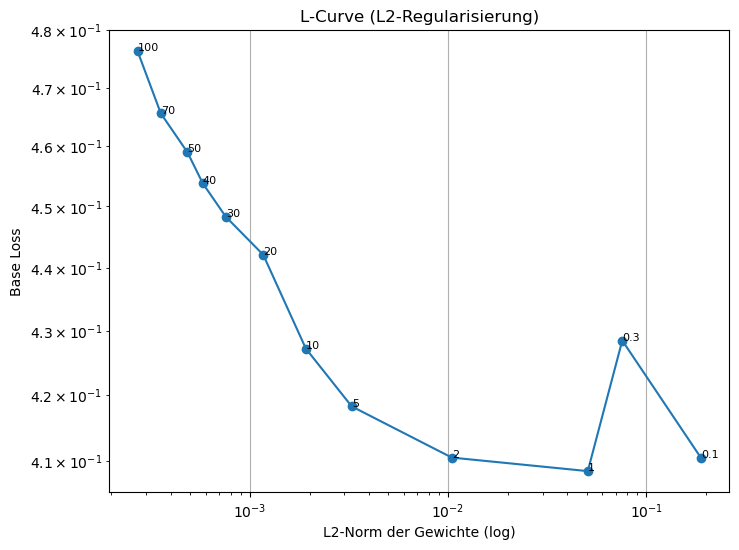

In [61]:
alphas = [0.1, 0.3, 1, 2, 5, 10, 20, 30, 40, 50, 70, 100]      
l2_norms = []
base_losses = []

for alpha in alphas:
    model_total_losses = []
    model_l_losses = []
    model_base_losses = []
    for lr in [0.1, 0.05, 0.03, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]:
        try:
            model = LR_complete(input_dimensions=X.shape[1])
            model.fit(X, y, regularization='l2', alpha=alpha, learning_rate=lr)

            # Prüfen auf NaN oder zu hohe Werte
            if np.isnan(model.final_total_loss) or model.final_total_loss > 1e6:
                raise ValueError("Unplausibler Verlust")

            model_total_losses.append(model.final_total_loss)
            model_l_losses.append(model.l2_norm)
            model_base_losses.append(model.final_base_loss)

        except Exception as e:
            print(f"Fehler bei alpha={alpha}, lr={lr}: {e}")
            continue  # nächsten Lernratenwert versuchen

    # Falls keine gültige Kombination gefunden wurde, überspringen
    if not model_total_losses:
        print(f"Keine gültigen Ergebnisse für alpha={alpha}")
        continue

    i = np.argmin(model_total_losses)

    print(i)
    
    l2_norms.append(model_l_losses[i])
    base_losses.append(model_base_losses[i])

plt.figure(figsize=(8, 6))
plt.plot(l2_norms, base_losses, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("L2-Norm der Gewichte (log)")
plt.ylabel("Base Loss")
plt.title("L-Curve (L2-Regularisierung)")
plt.grid(True)
for i, txt in enumerate(alphas):
    plt.annotate(f"{txt}", (l2_norms[i], base_losses[i]), fontsize=8)
plt.show()

Choose **$\alpha = 5$** for L2-regularization.

15
15
11
16
17
21
25
26
29
31
34


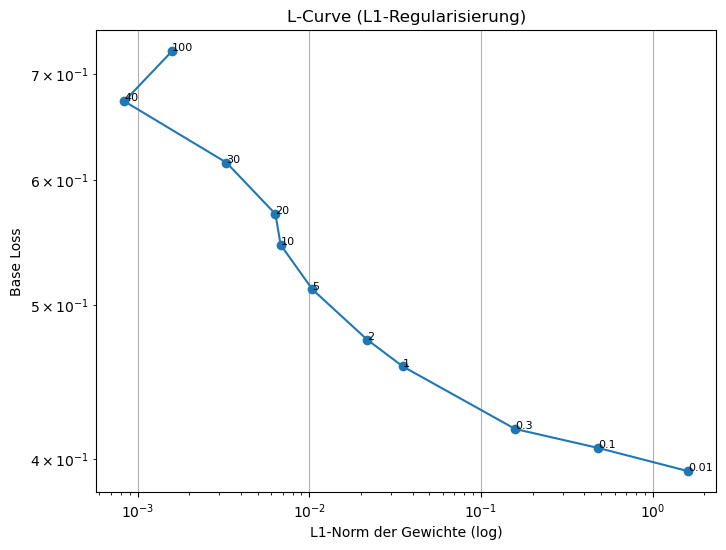

In [ ]:
alphas = [, 0.001, 0.01, 0.1, 0.3, 1, 2, 5, 10, 20, 30, 40]      
l1_norms = []
base_losses = []

for alpha in alphas:
    model_total_losses = []
    model_l_losses = []
    model_base_losses = []
    for lr in np.logspace(-2, -6, num = 40):
        try:
            model = LR_complete(input_dimensions=X.shape[1])
            model.fit(X, y, regularization='l1', alpha=alpha, learning_rate=lr)

            # Prüfen auf NaN oder zu hohe Werte
            if np.isnan(model.final_total_loss) or model.final_total_loss > 1e6:
                raise ValueError("Unplausibler Verlust")

            model_total_losses.append(model.final_total_loss)
            model_l_losses.append(model.l1_norm)
            model_base_losses.append(model.final_base_loss)

        except Exception as e:
            print(f"Fehler bei alpha={alpha}, lr={lr}: {e}")
            continue  # nächsten Lernratenwert versuchen

    # Falls keine gültige Kombination gefunden wurde, überspringen
    if not model_total_losses:
        print(f"Keine gültigen Ergebnisse für alpha={alpha}")
        continue

    i = np.argmin(model_total_losses)
    print(i)

    
    l1_norms.append(model_l_losses[i])
    base_losses.append(model_base_losses[i])

plt.figure(figsize=(8, 6))
plt.plot(l1_norms, base_losses, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("L1-Norm der Gewichte (log)")
plt.ylabel("Base Loss")
plt.title("L-Curve (L1-Regularisierung)")
plt.grid(True)
for i, txt in enumerate(alphas):
    plt.annotate(f"{txt}", (l1_norms[i], base_losses[i]), fontsize=8)
plt.show()

Choose $\alpha = $ for L1-Regularization.

## **Compare models with different regularizations by using crossvalidation**

In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


kf = KFold(n_splits=10, shuffle=True, random_state=42)


all_aucs = []
all_accuracies = []

for regularization, learning_rate, alpha in zip([None, 'l1', 'l2'], [0.01, 0.0005, 0.002], [None, 5, 0.3]):
    accuracies = []

    roc_aucs = []

    # Cross-Validation Schleife
    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        X_train_fold = X.iloc[train_index]
        y_train_fold = y.iloc[train_index]
        X_val_fold = X.iloc[val_index]
        y_val_fold = y.iloc[val_index]

        model = LR_complete(input_dimensions = X_train_fold.shape[1])

        model.fit(X_train_fold, y_train_fold, regularization = regularization, alpha = alpha, learning_rate = learning_rate)

        y_pred_fold = model.pred(X_val_fold)

        y_pred_fold = y_pred_fold.detach().numpy()

        y_pred_fold_classes = (y_pred_fold >= 0.5).astype(int)

        acc = accuracy_score(y_val_fold, y_pred_fold_classes)
        accuracies.append(acc)

        auc = roc_auc_score(y_val_fold, y_pred_fold)
        roc_aucs.append(auc)

        print(f"Fold {fold + 1}: Accuracy = {acc:.4f}, ROC AUC = {auc:.4f}")

    all_accuracies.append(accuracies)
    all_aucs.append(roc_aucs)
    

Fold 1: Accuracy = 0.8000, ROC AUC = 0.7593
Fold 2: Accuracy = 0.7000, ROC AUC = 0.8552
Fold 3: Accuracy = 0.4667, ROC AUC = 0.7801
Fold 4: Accuracy = 0.6333, ROC AUC = 0.8824
Fold 5: Accuracy = 0.8333, ROC AUC = 0.7600
Fold 6: Accuracy = 0.8000, ROC AUC = 0.9418
Fold 7: Accuracy = 0.9000, ROC AUC = 0.8523
Fold 8: Accuracy = 0.8667, ROC AUC = 0.8727
Fold 9: Accuracy = 0.6333, ROC AUC = 0.7870
Fold 10: Accuracy = 0.8276, ROC AUC = 0.8792
Fold 1: Accuracy = 0.6000, ROC AUC = 0.7500
Fold 2: Accuracy = 0.6333, ROC AUC = 0.7919
Fold 3: Accuracy = 0.7667, ROC AUC = 0.8472
Fold 4: Accuracy = 0.7333, ROC AUC = 0.8733
Fold 5: Accuracy = 0.8333, ROC AUC = 0.8000
Fold 6: Accuracy = 0.8667, ROC AUC = 0.9206
Fold 7: Accuracy = 0.8000, ROC AUC = 0.8523
Fold 8: Accuracy = 0.7667, ROC AUC = 0.7950
Fold 9: Accuracy = 0.6000, ROC AUC = 0.7963
Fold 10: Accuracy = 0.7931, ROC AUC = 0.8583
Fold 1: Accuracy = 0.6667, ROC AUC = 0.7778
Fold 2: Accuracy = 0.7000, ROC AUC = 0.8552
Fold 3: Accuracy = 0.8000, ROC

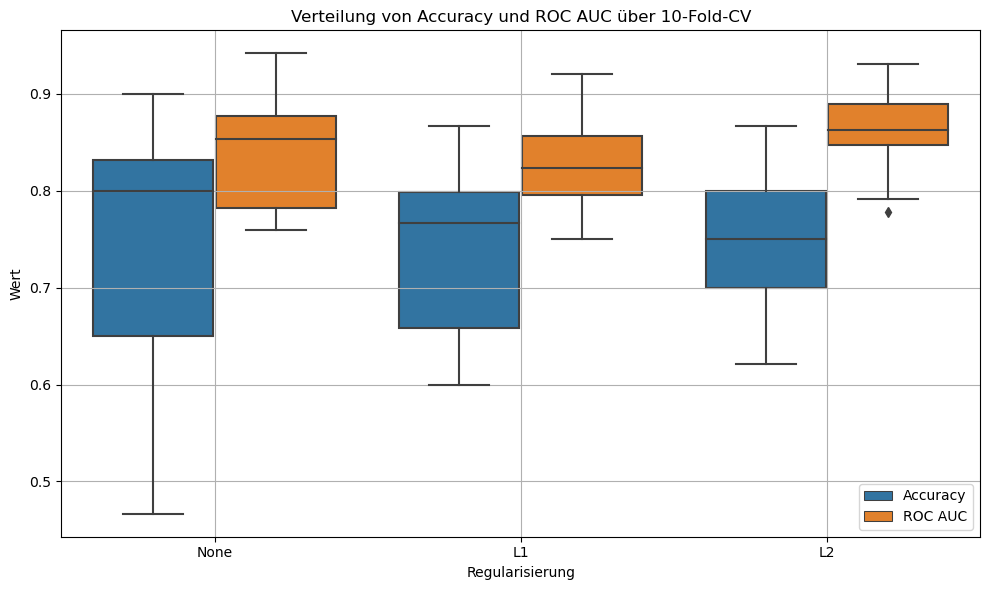

In [64]:
import seaborn as sns

# Labels für Regularisierungsarten
methods = ['None', 'L1', 'L2']

# Accuracy-Daten vorbereiten
acc_data = []
for i, method in enumerate(methods):
    for acc in all_accuracies[i]:
        acc_data.append({'Regularisierung': method, 'Metrik': 'Accuracy', 'Wert': acc})

# AUC-Daten vorbereiten
auc_data = []
for i, method in enumerate(methods):
    for auc in all_aucs[i]:
        auc_data.append({'Regularisierung': method, 'Metrik': 'ROC AUC', 'Wert': auc})

# Kombinieren
plot_data = pd.DataFrame(acc_data + auc_data)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=plot_data, x='Regularisierung', y='Wert', hue='Metrik')
plt.title('Verteilung von Accuracy und ROC AUC über 10-Fold-CV')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Now we want to comapre the parameter values.

In [65]:
model_weights = {}
regularizations = [None, 'l1', 'l2']
learning_rates = [0.01, 0.0005, 0.002]
alphas = [None, 5, 0.3]

for reg, lr, alpha in zip(regularizations, learning_rates, alphas):
    model = LR_complete(input_dimensions=X.shape[1])
    model.fit(X, y, regularization=reg, alpha=alpha, learning_rate=lr)
    
    weights = model.final_weights.detach().numpy().flatten()
    model_weights[reg if reg else 'None'] = weights


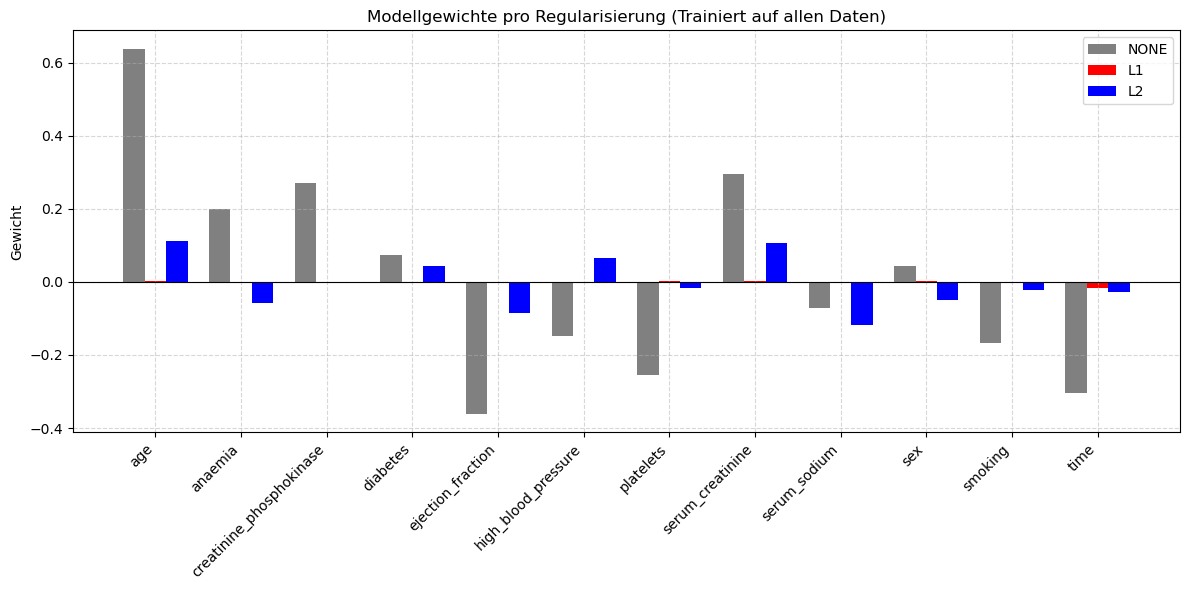

In [66]:
feature_names = X.columns
x = np.arange(len(feature_names))

plt.figure(figsize=(12, 6))

width = 0.25
offsets = {'None': -width, 'l1': 0, 'l2': width}
colors = {'None': 'gray', 'l1': 'red', 'l2': 'blue'}

for reg_type in ['None', 'l1', 'l2']:
    weights = model_weights[reg_type]
    plt.bar(x + offsets[reg_type], weights, width=width, label=reg_type.upper(), color=colors[reg_type])

plt.xticks(x, feature_names, rotation=45, ha='right')
plt.ylabel('Gewicht')
plt.title('Modellgewichte pro Regularisierung (Trainiert auf allen Daten)')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()